https://github.com/SalishSeaCast/analysis-susan/blob/master/notebooks/Crashes/201905_Rerun_from-15Nov17.ipynb

kt=****** max abs(U):   40.51    , i j k:     2  392   24

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc

%matplotlib inline

In [4]:
# w = nc.Dataset('SalishSeaCast_06503760_restart.nc')

restart_file = xr.open_dataset('SalishSeaCast_06503760_restart.nc')
# restart_file

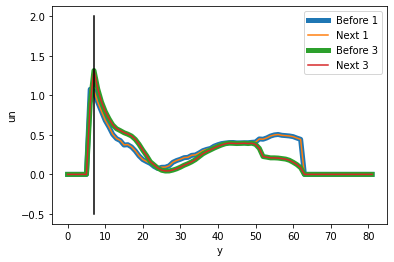

In [7]:

ib, ie = 385, 467
uveln19 = restart_file.un[0, 25-1]
uvelb19 = restart_file.ub[0, 25-1]
uvelb19[ib:ie, 1].plot(label="Before 1", linewidth=5)
uveln19[ib:ie, 1].plot(label="Next 1")
uvelb19[ib:ie, 3].plot(label="Before 3", linewidth=5)
uveln19[ib:ie, 3].plot(label="Next 3")
plt.plot([392-ib, 392-ib], [-0.5, 2], color='k');
plt.legend();

In [8]:
restart_file.un[0, :, :, 1] = restart_file.un[0, :, :, 2]
restart_file.ub[0, :, :, 1] = restart_file.ub[0, :, :, 2]
restart_file.vn[0, :, :, 1] = restart_file.vn[0, :, :, 2]
restart_file.vb[0, :, :, 1] = restart_file.vb[0, :, :, 2]

In [9]:
restart_file.attrs['Modified'] = 'copied velocity one away from west boundary to boundary'
restart_file.attrs

{'file_name': 'SalishSeaCast_06503760_restart.nc',
 'TimeStamp': '29/10/2021 20:59:34 -0400',
 'Modified': 'copied velocity one away from west boundary to boundary'}

In [12]:
restart_file.to_netcdf('SalishSeaCast_06503760_restart_boop.nc')
